In [33]:
from NNModels import Descriptors
import conventionalNN_utilities as utilNN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as skl

df = pd.read_csv('temp_cleaned_data.tsv', sep='\t')
seed = 123

### Generating the descriptor data frame

In [65]:
properties = utilNN.get_properties_df(df)
properties

,CrippenClogP,CrippenMR,FractionCSP3,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,...,NumSpiroAtoms,NumUnspecifiedAtomStereoCenters,exactmw,labuteASA,lipinskiHBA,lipinskiHBD,tpsa,Wavelength,Epsilon,Quantum Yield
0,1.68660,26.4420,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,78.046950,37.431403,0.0,0.0,0.00,254.75,210,0.0530
1,1.99502,31.1790,0.142857,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,92.062600,43.796345,0.0,0.0,0.00,261.75,2860,0.1700
2,2.30344,35.9160,0.250000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,106.078250,50.161287,0.0,0.0,0.00,263.00,254,0.1700
3,2.30344,35.9160,0.250000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,106.078250,50.161287,0.0,0.0,0.00,265.00,284,0.1300
4,2.30344,35.9160,0.250000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,106.078250,50.161287,0.0,0.0,0.00,275.00,770,0.2200
5,2.61186,40.6530,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,120.093900,56.526229,0.0,0.0,0.00,265.00,190,0.0880
6,2.92028,45.3900,0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,134.109550,62.891172,0.0,0.0,0.00,278.00,214,0.3000
7,3.22870,50.1270,0.454545,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,148.125201,69.256114,0.0,0.0,0.00,271.00,629,0.0750
8,3.53712,54.8640,0.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,162.140851,75.621056,0.0,0.0,0.00,271.00,214,0.0100
9,1.39220,28.1068,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,94.041865,42.225637,1.0,1.0,20.23,270.75,2340,0.0750


### Separating descriptors and predictors

In [17]:
X = properties.drop(['Wavelength', 'Epsilon', 'Quantum Yield'], axis=1).values
Y = properties[['Wavelength', 'Epsilon', 'Quantum Yield']].values

In [40]:
len(X[0])


25

### Performing a train-test split

In [18]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [22]:
X_train_scaler = StandardScaler().fit(X_train_pn)
X_train = X_train_scaler.transform(X_train_pn)

(array([21.,  9.,  8.,  6.,  1.,  5.,  2.,  1.,  0.,  1.]),
 array([ 31.1814 ,  54.65831,  78.13522, 101.61213, 125.08904, 148.56595,
        172.04286, 195.51977, 218.99668, 242.47359, 265.9505 ]),
 <a list of 10 Patch objects>)

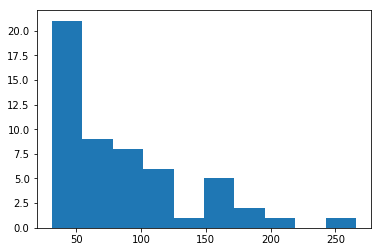

In [27]:
plt.hist(X_test_pn[:,1])

In [28]:
X_test = X_train_scaler.transform(X_test_pn)

(array([21.,  9.,  8.,  6.,  1.,  5.,  2.,  1.,  0.,  1.]),
 array([-1.1088996 , -0.63451361, -0.16012763,  0.31425836,  0.78864434,
         1.26303033,  1.73741631,  2.2118023 ,  2.68618828,  3.16057427,
         3.63496025]),
 <a list of 10 Patch objects>)

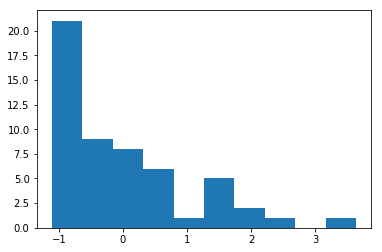

In [29]:
plt.hist(X_test[:,1])

### Creating the neural network layout

In [70]:
def simple_model():
    # assemble the structure
    model = Sequential()
    model.add(Dense(3, input_shape=(25,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(3, kernel_initializer='normal'))
    model.add(Dense(3, kernel_initializer='normal'))
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [71]:
# initialize the andom seed as this is used to generate
# the starting weights
np.random.seed(seed)
# create the NN framework
estimator = KerasRegressor(build_fn=simple_model,
        epochs=150, batch_size=25000, verbose=0)
history = estimator.fit(X_train, y_train, validation_split=0.33, epochs=150, 
        batch_size=10000, verbose=0)

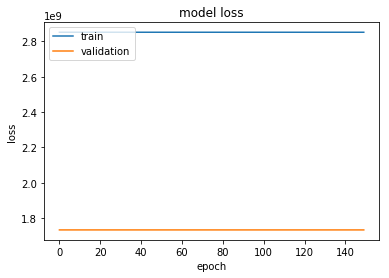

In [72]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [73]:
test_loss = estimator.model.evaluate(X_test, y_test)
print("test set mse is %.2f" % test_loss)

54/54 [==============================] - 0s 72us/step
test set mse is 1737176955.26


In [67]:
from keras.layers import Dense, Input
from keras.models import Model

Input_1= Input(shape=(25, ))

x = Dense(267, activation='relu')(Input_1)
x = Dense(267, activation='relu')(x)
x = Dense(267, activation='relu')(x)

out1 = Dense(3,  activation='linear')(x)
out2 = Dense(3,  activation='linear')(x)
out3 = Dense(3,  activation='linear')(x)


model = Model(inputs=Input_1, outputs=[out1,out2,out3])
model.compile(optimizer = "rmsprop", loss = 'mse')

# initialize the andom seed as this is used to generate
# the starting weights
np.random.seed(seed)
# create the NN framework
estimator = KerasRegressor(build_fn=model,
        epochs=150, batch_size=25000, verbose=0)
history = estimator.fit(X_train, y_train, validation_split=0.33, epochs=150, 
        batch_size=10000, verbose=0)

test_loss = estimator.model.evaluate(X_test, y_test)
print("test set mse is %.2f" % test_loss)

TypeError: __call__() missing 1 required positional argument: 'inputs'

In [ ]:
from keras.layers import Dense, Input
from keras.models import Model
 
# creating model
inputs = Input(shape = (25,))
dense1 = Dense(512, activation = 'relu')(inputs)
dense2 = Dense(128, activation = 'relu')(dense1)
dense3 = Dense(32, activation = 'relu')(dense2)
 
# create classification output
classification_output = Dense(10, activation = 'softmax')(dense3)
 
# use output from dense layer 3 to create autoencder output
up_dense1 = Dense(128, activation = 'relu')(dense3)
up_dense2 = Dense(512, activation = 'relu')(up_dense1)
decoded_outputs = Dense(784)(up_dense2)
